In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/Users/darrenmathewjacob/Downloads/archive/Bangalore.csv")

In [14]:
#use pricing as y and use square feet as a x
data[1:2]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [16]:
#title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=data[feature],
                      y=data[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [17]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [21]:
data.shape

(6207, 40)

Epoch 1/100
104/104 [==============================] - 0s 580us/step - loss: 310914796486656.0000 - root_mean_squared_error: 17632776.0000
Epoch 2/100
104/104 [==============================] - 0s 545us/step - loss: 310510734016512.0000 - root_mean_squared_error: 17621314.0000
Epoch 3/100
104/104 [==============================] - 0s 516us/step - loss: 310098316492800.0000 - root_mean_squared_error: 17609608.0000
Epoch 4/100
104/104 [==============================] - 0s 819us/step - loss: 309703112392704.0000 - root_mean_squared_error: 17598384.0000
Epoch 5/100
104/104 [==============================] - 0s 505us/step - loss: 309302204039168.0000 - root_mean_squared_error: 17586990.0000
Epoch 6/100
104/104 [==============================] - 0s 515us/step - loss: 308912100212736.0000 - root_mean_squared_error: 17575896.0000
Epoch 7/100
104/104 [==============================] - 0s 508us/step - loss: 308523137236992.0000 - root_mean_squared_error: 17564826.0000
Epoch 8/100
104/104 [======

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1) + inhomogeneous part.

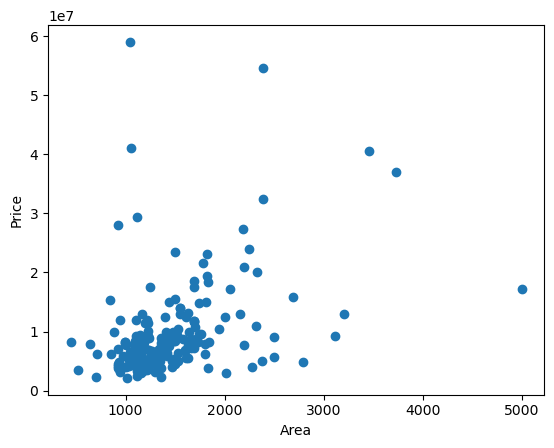

In [22]:
# The following variables are the hyperparameters.
learning_rate = 0.1
epochs = 100
batch_size = 60

# Specify the feature and the label.
my_feature = "Area"  # the total number of rooms on a specific city block.
my_label="Price" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [37]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = data[feature][0:0+n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted      difference")
  print("--------------------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f %20.0f" % (data[feature][i],
                                   data[label][i],
                                   predicted_values[i],
                                   abs(data[label][i]- predicted_values[i])))

In [38]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted      difference
--------------------------------------
 3340 30000000         3229049             26770951
 1045 7888000         1010989              6877011
 1179 4866000         1140497              3725503
 1675 8358000         1619868              6738132
 1670 6845000         1615036              5229964
 1220 6797000         1180122              5616878
 2502 20000000         2419143             17580857
 1438 7105000         1390814              5714186
 1405 8405000         1358920              7046080
  660 3506000          638896              2867104
